# Example 1: The Necessity Gap for Minkowski Sums

In this example, we look for an instance of the following problem. We are given two H-polytopes $A,B$. We manually find the H-polytope form of $C:=A \oplus B$. Now we want to check if $$ C \subseteq A \oplus B \subseteq C$$ 

Let $A$ be a triangle.

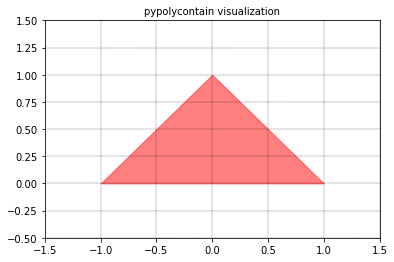

In [6]:
import numpy as np
import pypolycontain as pp
# import pypolycontain.objects
# import pypolycontain.visualize


H=np.array([[1,1],[-1,1],[0,-1]])
h=np.array([[1,1,0]]).reshape(3,1)
p_triangle=pp.objects.H_polytope(H,h)

pp.visualize.visualize([p_triangle])

And let $B$ be a tiny rectangle at the bottom of $A$ as follows.

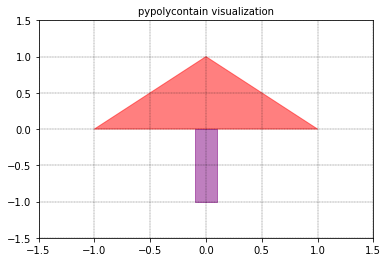

In [2]:
e=0.1
H=np.array([[1,0],[-1,0],[0,-1],[0,1]])
h=np.array([[e,e,1,0]]).reshape(4,1)
p_rectangle=pp.objects.H_polytope(H,h,color='purple')

pp.visualize.visualize([p_triangle,p_rectangle])

The H-polytope form of the Minkowski sum $A \oplus B$ can be easily found. 

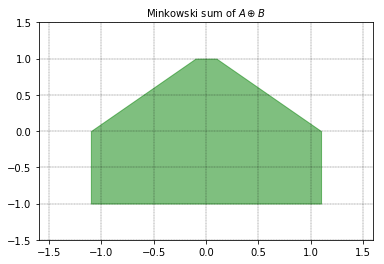

In [3]:
e=0.1
H=np.array([[1,0],[-1,0],[0,-1],[1,1],[-1,1],[0,1]])
h=np.array([[1+e,1+e,1,1+e,1+e,1]]).reshape(6,1)
p_sum=pp.objects.H_polytope(H,h,color='green')

pp.visualize.visualize([p_sum],title="Minkowski sum of $A \oplus B$")

We can also call the AH-polytope form of $A\oplus B$.

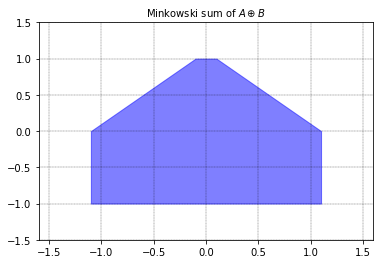

In [4]:
Q=pp.operations.minkowski_sum(p_triangle,p_rectangle)
pp.visualize.visualize([Q],title="Minkowski sum of $A \oplus B$")

Now we run the following experiment. We find the largest
$$
\begin{array}{lll}
\alpha^*_N = &  \max. & \alpha \\
& \text{subject to} & \alpha C \subseteq_N (A \oplus B)
\end{array}
$$
where for $N=-1$ the condition is necessary and sufficient and for $N=0$ it is only sufficient. 

What we expect is that for necessary and sufficient condition, we obtain the largest possible $\alpha^*$, which is 1. However, as we drop necessity, we are going to observe conservatieness in the fact that $$\alpha_i\le 1, i \ge 0.$$  

### Maximzing of $\alpha$ with subset encoding: linear program

We import the ```mathematicalprogram``` module from ```pydrake```. As the optimization solver, we import Gurobi bindings of pydrake, but other solvers may also be used - there are often slower. 

In [5]:
import pydrake.solvers.mathematicalprogram as MP
# use Gurobi solver
import pydrake.solvers.gurobi as Gurobi_drake
gurobi_solver=Gurobi_drake.GurobiSolver()
Theta={}
for i in range(-1,4):
    prog=MP.MathematicalProgram()
    alpha=prog.NewContinuousVariables(1,"alpha")
    p_test_H=pp.objects.H_polytope(p_sum.H,p_sum.h)
    p_test=pp.objects.AH_polytope(T=np.eye(2)*alpha,t=np.zeros((2,1)),P=p_test_H)
    Theta[i]=pp.containment.subset(prog,p_test,Q,N=i)
    prog.AddLinearCost(-np.eye(1),np.zeros((1)),alpha)
    result=gurobi_solver.Solve(prog,None,None)
    if result.is_success():
        print("%d: subset test successfull"%i)
        print(r"alpha^*=",result.GetSolution(alpha))
    else:
        print("not a subset") 

Theta Dimensions were (7, 7)
-1: subset test successfull
alpha^*= [0.6875]
Theta Dimensions were (7, 9)
0: subset test successfull
alpha^*= [1.]
Theta Dimensions were (7, 12)
1: subset test successfull
alpha^*= [0.733057]
Theta Dimensions were (7, 7)
2: subset test successfull
alpha^*= [0.6875]
Theta Dimensions were (7, 7)
3: subset test successfull
alpha^*= [0.6875]
